<a href="https://colab.research.google.com/github/Rogerio-mack/ABCXYZ/blob/main/IA_PF_2025S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data outside the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Build the TensorFlow model (same as before)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for Iris
])

# Compile the model, changing the loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Changed loss function
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model with the encoded y
history = model.fit(X_train_scaled, y_train_encoded, epochs=2, batch_size=5, validation_split=0.2)

# Evaluate the model on the test set with the encoded y
loss, accuracy, precision, recall = model.evaluate(X_test_scaled, y_test_encoded)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")

print(model.summary())


Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.1731 - loss: 1.2264 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 1.1008 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 2/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3503 - loss: 1.1163 - precision_10: 0.2937 - recall_10: 0.0089 - val_accuracy: 0.5000 - val_loss: 1.0179 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3667 - loss: 1.0346 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00
Test Loss: 1.0346112251281738
Test Accuracy: 0.36666667461395264
Test Precision: 0.0
Test Recall: 0.0


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 388 (1.52 KB)

None


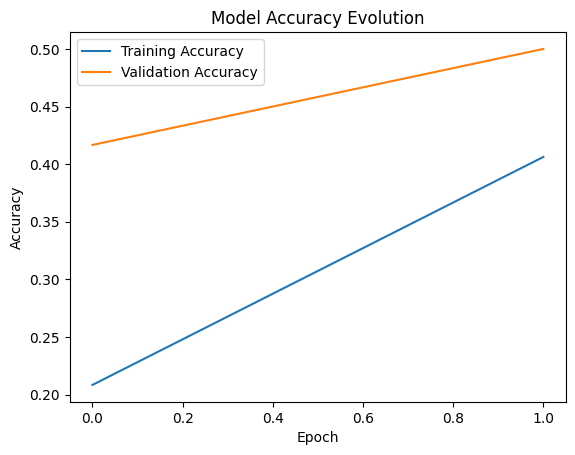

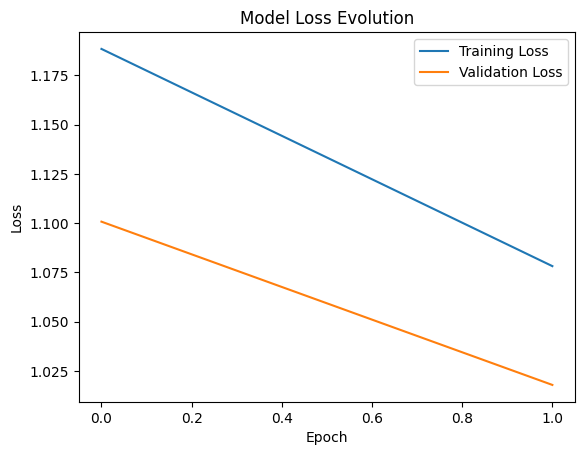

In [41]:
# prompt: plote o gráfico de evolução do modelo

import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [39]:
# Número pesos da rede
10*(4+1) + 10*(10+1) + 3*(10+1)

193

In [29]:

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Make predictions on the test set
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1) # Get the predicted class index

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step

Confusion Matrix:
[[8 0 2]
 [2 0 7]
 [1 7 3]]


In [ ]:
setosa:
1. VP + FN = 10 (support)
2. recall: 0.8 = VP / (VP + FN) => 0.8 = VP / 10 => VP = 8
3. VP + FN = 10 => 8 + FN = 10 => FN = 2

virginica:
1. VP + FN = 9 => 0 + (2 + x) = 9 => x = 7


In [30]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       0.73      0.80      0.76        10
  versicolor       0.00      0.00      0.00         9
   virginica       0.25      0.27      0.26        11

    accuracy                           0.37        30
   macro avg       0.33      0.36      0.34        30
weighted avg       0.33      0.37      0.35        30



In [42]:

# Calculate TP, FP, TN, FN for each class from the confusion matrix
# The confusion matrix is indexed as:
# conf_matrix[true_class][predicted_class]
# For a given class `i`:
# TP = conf_matrix[i][i]
# FP = sum of column i (excluding conf_matrix[i][i])
# FN = sum of row i (excluding conf_matrix[i][i])
# TN = sum of all elements excluding row i and column i

num_classes = conf_matrix.shape[0]

for i in range(num_classes):
    tp = conf_matrix[i, i]
    fp = conf_matrix[:, i].sum() - tp
    fn = conf_matrix[i, :].sum() - tp
    tn = conf_matrix.sum() - (tp + fp + fn)

    print(f"\nMetrics for class '{iris.target_names[i]}':")
    print(f"  True Positives (TP): {tp}")
    print(f"  False Positives (FP): {fp}")
    print(f"  False Negatives (FN): {fn}")
    print(f"  True Negatives (TN): {tn}")


Metrics for class 'setosa':
  True Positives (TP): 8
  False Positives (FP): 3
  False Negatives (FN): 2
  True Negatives (TN): 17

Metrics for class 'versicolor':
  True Positives (TP): 0
  False Positives (FP): 7
  False Negatives (FN): 9
  True Negatives (TN): 14

Metrics for class 'virginica':
  True Positives (TP): 3
  False Positives (FP): 9
  False Negatives (FN): 8
  True Negatives (TN): 10


In [36]:
import pickle
import os

# Create a directory to save the artifacts if it doesn't exist
save_dir = '/content'
os.makedirs(save_dir, exist_ok=True)

# Save the trained model
model.export(os.path.join(save_dir, 'iris_model'))

# Save the training and testing datasets
with open(os.path.join(save_dir, 'X_train.pkl'), 'wb') as f:
    pickle.dump(X_train, f)

with open(os.path.join(save_dir, 'X_test.pkl'), 'wb') as f:
    pickle.dump(X_test, f)

with open(os.path.join(save_dir, 'y_train.pkl'), 'wb') as f:
    pickle.dump(y_train, f)

with open(os.path.join(save_dir, 'y_test.pkl'), 'wb') as f:
    pickle.dump(y_test, f)

# Save the scaler as well, as it's needed for future predictions
with open(os.path.join(save_dir, 'scaler.pkl'), 'wb') as f:
    pickle.dump(scaler, f)

print(f"Model and data saved to directory: {save_dir}")

Saved artifact at '/content/iris_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor_40')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  138345102209104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138345102197776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138345102211024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138345102205840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138345102204496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138345236020112: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model and data saved to directory: /content
